In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

with open('../data/subj/train_new_subj.jsonl') as f:
    df = pd.read_json(f, lines=True)

In [7]:
# larger value among 0 and 1 becomes pseudo_gt
df['pseudo_gt'] = df[["0","1"]].idxmax(axis=1)
df['pseudo_gt'] = df['pseudo_gt'].astype(int)

# accuracy: corrrect if pseudo_gt == label
sum((df['pseudo_gt'] == df['label']))/len(df)


0.9855714285714285

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


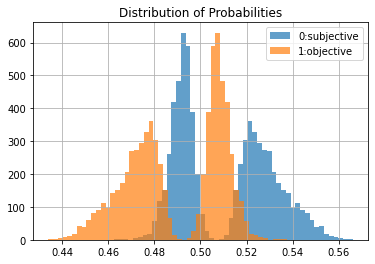

In [37]:
# overrall distribution of label 0 and 1 probabilities
print(df['0'].hist(bins=50, alpha=0.7))
print(df['1'].hist(bins=50, alpha=0.7))
import matplotlib.pyplot as plt
plt.legend(['0:subjective','1:objective'])
plt.title("Distribution of Probabilities")
plt.show()


In [9]:
# cases where pseudo_gt != label
pseudo_wrong= df[df['pseudo_gt'] != df['label']]
pseudo_wrong

,text,label,label_text,0,1,pseudo_gt
29,the only way around this is using illegal simu...,1,objective,0.502284,0.497716,0
42,"primarily , the audience is wealthy , bored ex...",1,objective,0.502572,0.497428,0
61,she can't get in there because te door is lock...,1,objective,0.500048,0.499952,0
172,just when it seems martha's influence may be h...,1,objective,0.500368,0.499632,0
490,"if you act in an inverse way , you will not ha...",1,objective,0.502438,0.497562,0
...,...,...,...,...,...,...
6770,he also tells him that they are not gems .,1,objective,0.505710,0.494290,0
6820,"although he has feelings on the inside , he is...",1,objective,0.502426,0.497574,0
6830,"he supports her completely , particularly as s...",1,objective,0.502331,0.497669,0
6865,"in his own mental state , he sees his wife ali...",1,objective,0.505557,0.494443,0


In [35]:
# count of label 0 and 1 in pseudo_wrong
print(pseudo_wrong['label'].value_counts())

1    101
Name: label, dtype: int64


In [42]:
# count of label 0 and 1 in entire data
print(df['label'].value_counts()/7000)

0    0.505714
1    0.494286
Name: label, dtype: float64


In [43]:
# count of label 0 and 1 in entire data
print(df['pseudo_gt'].value_counts())
print(df['pseudo_gt'].value_counts()/7000)

0    3641
1    3359
Name: pseudo_gt, dtype: int64
0    0.520143
1    0.479857
Name: pseudo_gt, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


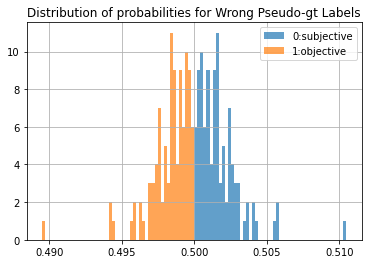

In [36]:
# overrall distribution of label 0 and 1 probabilities, set opacity to 0.5
print(pseudo_wrong['0'].hist(bins=50, alpha=0.7))
print(pseudo_wrong['1'].hist(bins=50, alpha=0.7))
# add legend
plt.legend(['0:subjective','1:objective'])
plt.title("Distribution of probabilities for Wrong Pseudo-gt Labels")
plt.show()


In [15]:
df

,text,label,label_text,0,1,pseudo_gt
0,the mystery of enigma is how a rich historical...,0,subjective,0.519648,0.480352,0
1,bernal's transformation from naive priest to t...,0,subjective,0.531106,0.468894,0
2,if [jaglom's] latest effort is not the directo...,0,subjective,0.519456,0.480544,0
3,this movie is maddening . it conveys a simple ...,0,subjective,0.527671,0.472329,0
4,"in her confusion and grief , she finds consola...",1,objective,0.493912,0.506088,1
...,...,...,...,...,...,...
6995,if you're as happy listening to movies as you ...,0,subjective,0.520270,0.479730,0
6996,"'divertida , enternecedora , universal y profu...",0,subjective,0.514480,0.485520,0
6997,"in the end , the film is less the cheap thrill...",0,subjective,0.514250,0.485750,0
6998,"death to smoochy tells a moldy-oldie , not-nea...",0,subjective,0.521340,0.478660,0


([<matplotlib.axis.XTick at 0x7f9c6409c050>,
 [Text(1, 0, '0'), Text(2, 0, '1')])

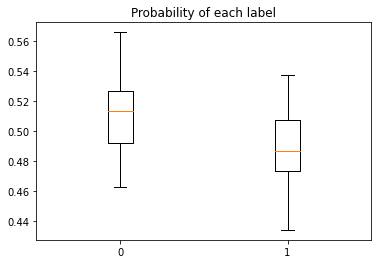

In [40]:
# box plot for pseudo_gt probability
plt.boxplot([df['0'], df['1']])
plt.title("Probability of each label")
plt.xticks([1, 2], ['0', '1'])

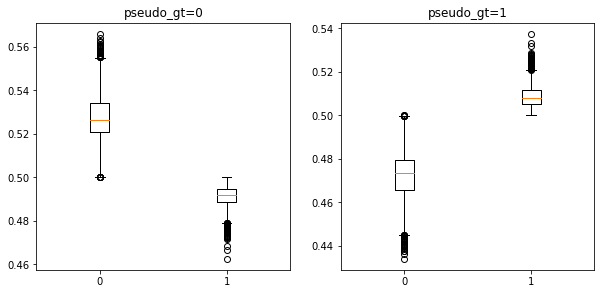

In [25]:
# box plot of each '0' and '1' probability for each pseudo_gt label
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.boxplot([df.loc[df['pseudo_gt'] == 0]['0'], df.loc[df['pseudo_gt'] == 1]['0']])
plt.xticks([1, 2], ['0', '1'])
plt.title('pseudo_gt=0')

plt.subplot(2,2,2)
plt.boxplot([df.loc[df['pseudo_gt'] == 0]['1'], df.loc[df['pseudo_gt'] == 1]['1']])
plt.xticks([1, 2], ['0', '1'])
plt.title('pseudo_gt=1')

plt.show()